Getting Data from website "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [77]:
from __future__ import absolute_import, division, print_function

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import os
import io
import pandas as pd
import requests


In [78]:

url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
s=requests.get(url).content
data_con=pd.read_csv(io.StringIO(s.decode('utf-8')))
data_con.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


Separating out the confirmed cases for each country and summing them.

In [47]:
names=data_con['Country/Region'].unique()    
data1=pd.DataFrame([])
i=0
for x in names:
      data=data_con.where(data_con['Country/Region']==x).sum()
      data.loc['Province/State']=x
      data1.loc[0:len(data),i]=data
      i=i+1
df=data1.iloc[3:]
df.columns=data1.iloc[0].T
del df['Nepal']
df=df.astype(float)

In [79]:
df.tail()


Province/State,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Mozambique,Syria,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis
3/21/20,24.0,76.0,139.0,88.0,2.0,1.0,158.0,160.0,1071.0,2814.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0
3/22/20,40.0,89.0,201.0,113.0,2.0,1.0,266.0,194.0,1549.0,3582.0,...,1.0,1.0,1.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0
3/23/20,40.0,104.0,230.0,133.0,3.0,3.0,301.0,235.0,1682.0,4474.0,...,1.0,1.0,1.0,1.0,0.0,0.0,59.0,0.0,0.0,0.0
3/24/20,74.0,123.0,264.0,164.0,3.0,3.0,387.0,249.0,2044.0,5283.0,...,3.0,1.0,1.0,1.0,2.0,1.0,59.0,0.0,0.0,0.0
3/25/20,84.0,146.0,302.0,188.0,3.0,3.0,387.0,265.0,2364.0,5588.0,...,5.0,5.0,1.0,2.0,3.0,1.0,-1.0,2.0,2.0,2.0


In [80]:
# storing last value for testing purpose
y_true=df.at['3/25/20','US']
y_true

65778.0

In [81]:
# removing last reading for testing
df_cut=df.iloc[0:(len(df)-1),:]

df_cut.tail()

Province/State,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Mozambique,Syria,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis
3/20/20,24.0,70.0,90.0,75.0,1.0,1.0,128.0,136.0,791.0,2388.0,...,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0
3/21/20,24.0,76.0,139.0,88.0,2.0,1.0,158.0,160.0,1071.0,2814.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0
3/22/20,40.0,89.0,201.0,113.0,2.0,1.0,266.0,194.0,1549.0,3582.0,...,1.0,1.0,1.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0
3/23/20,40.0,104.0,230.0,133.0,3.0,3.0,301.0,235.0,1682.0,4474.0,...,1.0,1.0,1.0,1.0,0.0,0.0,59.0,0.0,0.0,0.0
3/24/20,74.0,123.0,264.0,164.0,3.0,3.0,387.0,249.0,2044.0,5283.0,...,3.0,1.0,1.0,1.0,2.0,1.0,59.0,0.0,0.0,0.0


In [82]:
last=len(df_cut.index)-1
list1=[]

# Removing countries with less cases
for col in df_cut.columns:
    if df_cut.iloc[last][col]<4000:
        list1.append(col)

df1=df_cut.drop(df_cut[list1], axis=1)

df1["India"]=df_cut["India"] # adding India
df1.tail()

Province/State,Austria,Belgium,China,France,Germany,Iran,Italy,"Korea, South",Netherlands,Spain,Switzerland,United Kingdom,US,India
3/20/20,2388.0,2257.0,81250.0,12758.0,19848.0,19644.0,47021.0,8652.0,3003.0,20410.0,5294.0,4014.0,19100.0,244.0
3/21/20,2814.0,2815.0,81305.0,14463.0,22213.0,20610.0,53578.0,8799.0,3640.0,25374.0,6575.0,5067.0,25489.0,330.0
3/22/20,3582.0,3401.0,81435.0,16243.0,24873.0,21638.0,59138.0,8961.0,4217.0,28768.0,7474.0,5745.0,33276.0,396.0
3/23/20,4474.0,3743.0,81498.0,20123.0,29056.0,23049.0,63927.0,8961.0,4764.0,35136.0,8795.0,6726.0,43847.0,499.0
3/24/20,5283.0,4269.0,81591.0,22622.0,32986.0,24811.0,69176.0,9037.0,5580.0,39885.0,9877.0,8164.0,53740.0,536.0


<Figure size 720x576 with 0 Axes>

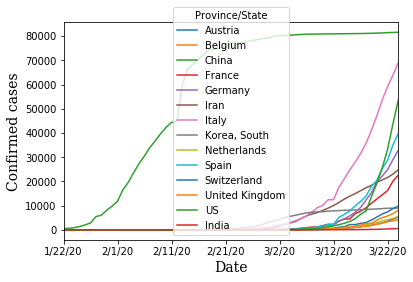

In [83]:
fig = plt.figure(figsize=(10,8))
df1.plot(y=df1.columns)

plt.xlabel('Date',family="serif",  fontsize=14)
plt.ylabel('Confirmed cases',family="serif",  fontsize=14)

plt.show()

In [84]:
df1.shape
type(df1)

pandas.core.frame.DataFrame

In [86]:
# Storing data for US in separate dataframe
# Can be modified for any country.
df_US=pd.DataFrame()
lenc=len(df1)
c=np.array(np.arange(0,lenc)).T
df_US["Days"]=c
df_US["US"]=df1["US"].values.astype('float')
df_US.tail()


,Days,US
58,58,19100.0
59,59,25489.0
60,60,33276.0
61,61,43847.0
62,62,53740.0


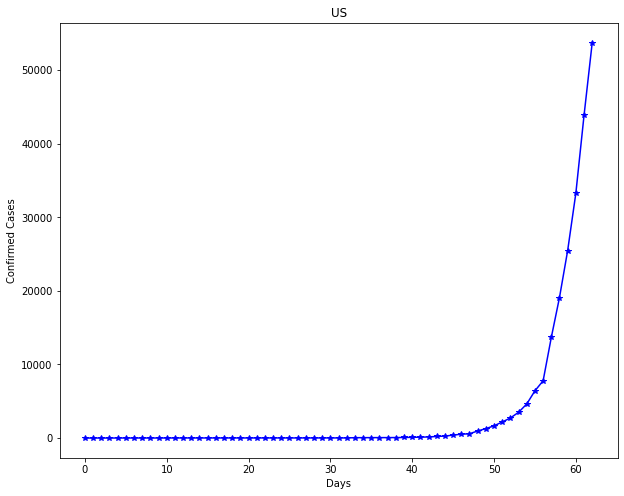

In [87]:
fig = plt.figure(figsize=(10,8))
plt.plot(df_US["Days"],df_US["US"],'b*-')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.title('US')
plt.show()

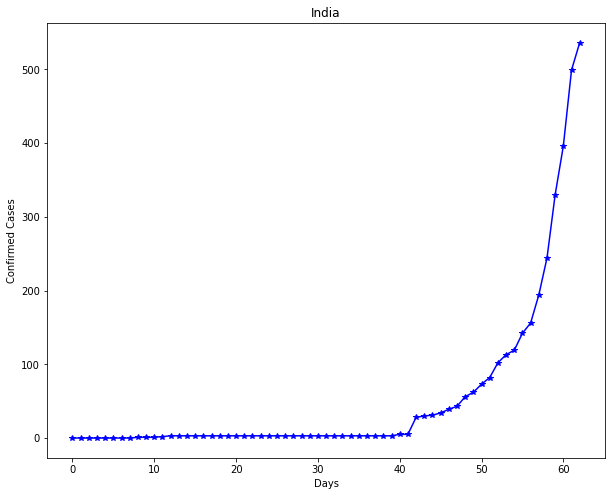

In [88]:
fig = plt.figure(figsize=(10,8))
plt.plot(df1["India"].values,'b*-')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.title('India')
plt.show()

Fitting exponential model to the data

In [89]:
import scipy as scipy
from scipy import optimize

In [90]:

X=df_US["Days"]
Y=df_US["US"]
# Define exponential function
def exponential(x, a, b, c):
    #equation=exp(a(1)*(xdata.^2)+a(2)*(xdata) + a(3))
    return np.exp(c+b*x+a*x*x)

popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,X,Y, p0=[0.01,0.001,0.001])
# we then can find the error of the fitting parameters from the pcov_linear array
perr_exponential = np.sqrt(np.diag(pcov_exponential))

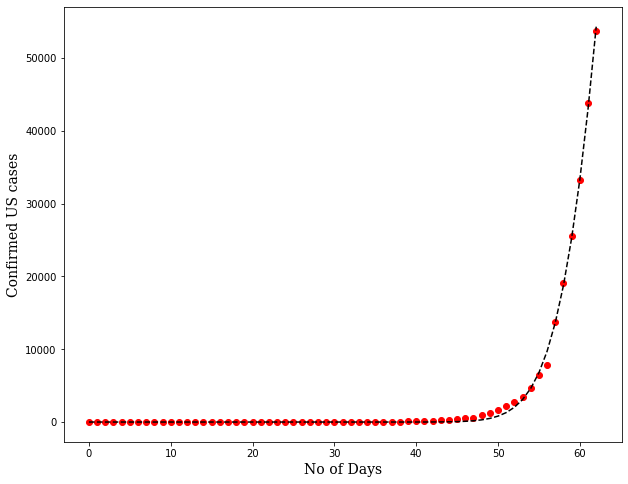

In [92]:
fig = plt.figure(figsize=(10,8))
plt.plot(X, Y, "ro",label='Data')
plt.plot(X, exponential(X, *popt_exponential), 'k--',
         label='Fitted Curve')

plt.xlabel('No of Days',family="serif",  fontsize=14)
plt.ylabel('Confirmed US cases',family="serif",  fontsize=14)
plt.show()


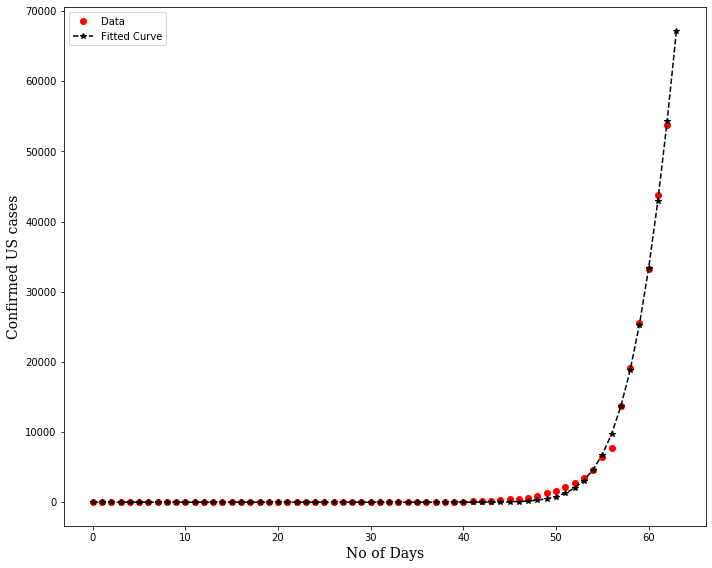

In [93]:
# Testing with one removed entry from above
X_n=np.append(X,np.array([lenc]))
Y_n=exponential(X_n, *popt_exponential)
fig = plt.figure(figsize=(10,8))
plt.plot(X, Y, "ro",label='Data')
plt.plot(X_n, Y_n, 'k--*',
         label='Fitted Curve')

plt.xlabel('No of Days',family="serif",  fontsize=14)
plt.ylabel('Confirmed US cases',family="serif",  fontsize=14)
plt.legend()

fig.tight_layout()
plt.show()
fig.savefig("fittedExponential.png", format="png",dpi=1000)

In [95]:
error=y_true-Y_n[len(Y_n)-1]
print("y_true:",y_true)
print("Y_predicted:",Y_n[len(Y_n)-1])

print('Error:',error)


y_true: 65778.0
Y_predicted: 67153.75892290552
Error: -1375.7589229055156
